In [25]:
# Load data
import pandas as pd

df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [26]:
df_train.shape

(42000, 785)

In [27]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_train.iloc[1]

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 1, Length: 785, dtype: int64

In [29]:
x = df_train.drop(['label'], axis=1)
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y = df_train['label']
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [108]:
y.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [31]:
x.shape

(42000, 784)

In [32]:
x_reshaped = x.values.reshape(42000, 28,28)

0


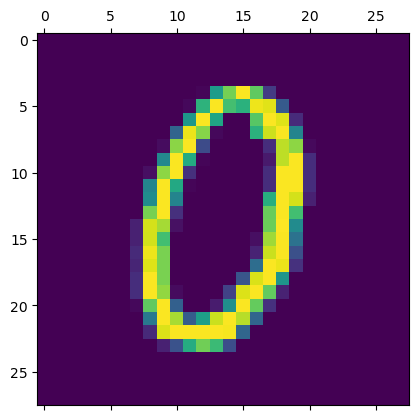

In [33]:
import matplotlib.pyplot as plt
plt.matshow(x_reshaped[5])
print(y[5])

In [34]:
# Get the look on values
x_reshaped[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

In [35]:
# Scaling data
x = x/255

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)

In [68]:
# Neural Network
import tensorflow as tf
from tensorflow import keras


In [124]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,)),
    keras.layers.LeakyReLU(alpha=0.05),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1050/1050 [==============================] - 5s 4ms/step - loss: 0.3391 - accuracy: 0.9030
Epoch 2/5
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1666 - accuracy: 0.9526
Epoch 3/5
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1194 - accuracy: 0.9657
Epoch 4/5
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0898 - accuracy: 0.9732
Epoch 5/5
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0707 - accuracy: 0.9793


In [144]:
# If we have y as 3,4,5 we can use sparse categorical
# if we have y as 0001000 as categorical df we can use categorical cross entropy

In [125]:
model.evaluate(x_test,y_test)

263/263 [==============================] - 1s 4ms/step - loss: 0.1242 - accuracy: 0.9630


[0.12416251003742218, 0.9629762172698975]

In [126]:
train_pred = model.predict(x_test)
train_pred[0]

263/263 [==============================] - 0s 2ms/step


array([1.1894100e-06, 8.5723608e-05, 6.4838804e-02, 8.7905681e-01,
       2.9542335e-07, 3.2309214e-05, 2.9807977e-06, 5.2590586e-02,
       3.0935123e-03, 2.9775547e-04], dtype=float32)

In [127]:
import numpy as np 
train_pred_labels = [np.argmax(i) for i in train_pred]
train_pred_labels[0]

3

In [128]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=train_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[795,   0,   1,   3,   0,   2,   1,   2,   2,   0],
       [  0, 932,   0,   1,   1,   1,   0,   2,   0,   0],
       [  2,   7, 774,  16,   3,   0,   2,  11,   6,   3],
       [  0,   1,   3, 871,   0,   4,   0,  12,   3,   4],
       [  0,   5,   2,   0, 746,   5,   3,   4,   0,  37],
       [  3,   0,   0,  18,   0, 713,   2,   3,   6,   6],
       [ 11,   2,   1,   0,   2,   7, 790,   2,   1,   0],
       [  1,   2,   1,   1,   1,   0,   0, 887,   1,   9],
       [  3,   8,   1,  17,   1,   5,   4,   5, 721,   8],
       [  4,   4,   0,   6,   3,   3,   0,   8,   2, 860]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

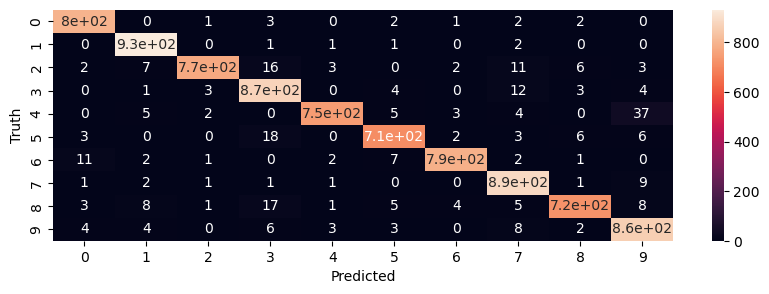

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,3))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [130]:
model.fit(x,y,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0695 - accuracy: 0.9789
Epoch 2/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0538 - accuracy: 0.9830
Epoch 3/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0425 - accuracy: 0.9872
Epoch 4/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0342 - accuracy: 0.9896
Epoch 5/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0301 - accuracy: 0.9905
Epoch 6/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0246 - accuracy: 0.9924
Epoch 7/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0198 - accuracy: 0.9945
Epoch 8/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0168 - accuracy: 0.9951
Epoch 9/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0144 - accuracy: 0.9959
Epoch 10/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.011

In [131]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
df_test_scaled = df_test/255

In [133]:
pred = model.predict(df_test_scaled)

875/875 [==============================] - 1s 1ms/step


In [134]:
df_test.shape

(28000, 784)

In [135]:
x_test_reshaped = df_test.values.reshape(len(df_test), 28,28)

9

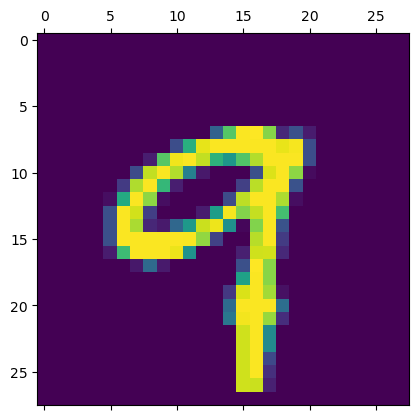

In [139]:
import numpy as np
plt.matshow(x_test_reshaped[20])
np.argmax(pred[20])

In [143]:
pred.shape

(28000, 10)

In [140]:
pred_label = [np.argmax(i) for i in pred]

In [141]:
last = pd.DataFrame(pred_label)
last

,0
0,2
1,0
2,9
3,9
4,3
...,...
27995,9
27996,7
27997,3
27998,9


In [142]:
last.to_csv('./data/predicted.csv', index=False)